<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/ML_Regression_Project/blob/main/ML_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member**  - Rooban . J

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install scikit-learn

In [ ]:
import sklearn; sklearn.show_versions()


System:
    python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-5.15.109+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.2
          pip: 23.1.2
   setuptools: 67.7.2
        numpy: 1.23.5
        scipy: 1.11.2
       Cython: 3.0.2
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
        version: 0.3.20
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so
        version: 0.3.21.dev
threading_layer: pthreads
   architecture: Haswell

       use

In [2]:
# Import Libraries

#Import Libraries for data cleaning and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt  #for processing datetime columns

#Import libraries for scaling, transforming, and modeling processes
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV




In [3]:
#Import Evaluation Metrics from Sci-Kit Package
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss


### Dataset Loading

In [4]:
# Load Dataset
from google.colab import files
uploaded = files.upload()


Saving SeoulBikeData.csv to SeoulBikeData.csv


In [5]:
import io
bike_df = pd.read_csv((io.BytesIO(uploaded['SeoulBikeData.csv'])),encoding='unicode_escape')
print(bike_df.sample(10))

            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
6500  28/08/2018                 10    20             23.3           97   
2373  09/03/2018                537    21              3.5           69   
3410  22/04/2018                410     2             15.4           41   
6132  13/08/2018                724    12             33.4           54   
8384  15/11/2018               1686     8              5.3           75   
1784  13/02/2018                568     8             -7.1           68   
2526  16/03/2018                222     6              4.4           61   
1050  13/01/2018                223    18             -2.6           73   
6653  04/09/2018                219     5             20.2           97   
8666  27/11/2018                299     2              3.9           85   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
6500               3.3               183                       22.7   
2373               1.4          

### Dataset First View

In [6]:
# Dataset First Look
bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
bike_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print(bike_df.shape)
print("No. of rows in the dataset : ",bike_df.shape[0])
print("No. of columns in the dataset : ",bike_df.shape[1])

(8760, 14)
No. of rows in the dataset :  8760
No. of columns in the dataset :  14


### Dataset Information

In [10]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print("Does data have any duplicate values ?",bike_df.duplicated().value_counts())

Does data have any duplicate values ? False    8760
dtype: int64


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

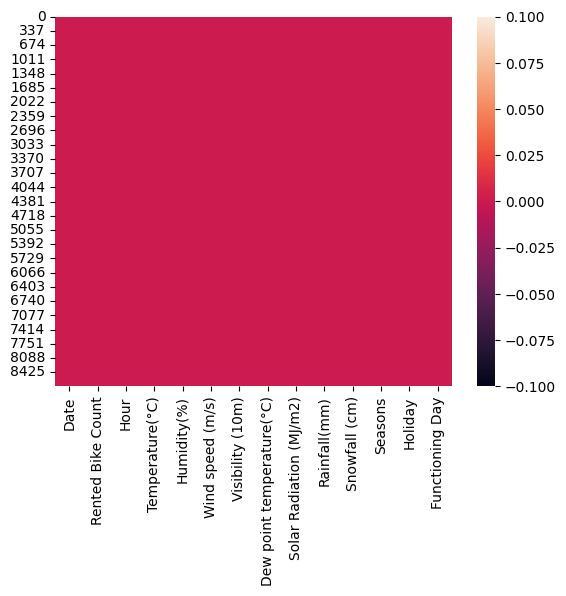

In [13]:
# Visualizing the missing values
# We're visualizing it on Heatmap
sns.heatmap(bike_df.isnull())

### What did you know about your dataset?

1. First of all from the name of the columns we know that this dataset have some attributes which influence the rental services of the bike in a city.

2. This dataset contains 8760 observations(rows) and 14 features(Columns).

3. For a year we have 365 days mostly and for a day we have 24 hours, so if we multiply the 24 and 365 we get our 8760 observations.

4. In this dataset we don't any null values and duplicate values. So dataset has all values as Unique Values.

5. Regarding Datatype of the columns, most of them are int and float type and object type also there in the dataset.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

## Breakdown of Our Features:

**Date** : The date of the day, from all of 365 days this data is in range (01/12/2017 to 30/11/2018) in DD/MM/YYYY format (type : str) . we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which is our dependent variable and we have to predict on this basis only (type : int)

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, we need to convert it into category data type. (type : int)

**Temperature(°C)**: Temperature in Celsius (type : Float)

**Humidity(%)**: Humidity in the air in % Percentage (type : int)

**Wind speed (m/s)** : Speed of the wind in m/s (type : Float)

**Visibility (10m)**: Visibility in m  (type : int)

**Dew point temperature(°C)**: Temperature at the beginning of the day  (type : Float)

**Solar Radiation (MJ/m2)**: Sun contribution  (type : Float)

**Rainfall(mm)**: Amount of raining in mm  (type : Float)

**Snowfall (cm)**: Amount of snowing in cm  (type : Float)

**Seasons**: Season of the year, there are only 4 season's in data   (type : str)

**Holiday**: If that particular day is holiday period or not   (type : str)

**Functioning Day**: If that particular day is a working day or not   (type : str)



### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
# Checking the count of unique variables in each columns
Columns = bike_df.columns
for i in Columns:
  print(f"Unique value counts in {i} is", bike_df[i].nunique())

Unique value counts in Date is 365
Unique value counts in Rented Bike Count is 2166
Unique value counts in Hour is 24
Unique value counts in Temperature(°C) is 546
Unique value counts in Humidity(%) is 90
Unique value counts in Wind speed (m/s) is 65
Unique value counts in Visibility (10m) is 1789
Unique value counts in Dew point temperature(°C) is 556
Unique value counts in Solar Radiation (MJ/m2) is 345
Unique value counts in Rainfall(mm) is 61
Unique value counts in Snowfall (cm) is 51
Unique value counts in Seasons is 4
Unique value counts in Holiday is 2
Unique value counts in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [18]:
# Write your code to make your dataset analysis ready.

# We are changing our Column names into more useable format, because it looks clumsy with some additional unit with it.

bike_df = bike_df.rename(columns={'Rented Bike Count' : 'Rented_Bike_count',
                        'Temperature(°C)':'Temperature',
                        'Humidity(%)' : 'Humidity',
                        'Wind speed (m/s)' : 'Wind_speed',
                        'Visibility (10m)' : 'Visibility',
                        'Dew point temperature(°C)' : 'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
                        'Rainfall(mm)' : 'Rainfall',
                        'Snowfall (cm)' : 'Snowfall',
                        'Functioning Day' : 'Functioning_Day'})
bike_df.columns

Index(['Date', 'Rented_Bike_count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [19]:
# we are breaking the whole date column into day, month and year for our better convenience in analysing
bike_df['Date'] = bike_df['Date'].str.replace('-',"/")
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))


In [20]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [21]:
# Creating a new column to store the value as weekend or weekdays in binary format

bike_df['weekday/weekend'] = bike_df['day'].apply(lambda x : 1 if x=="Saturday" or x=="Sunday" else 0)

# now we're dropping day, month and year colour because it doesn't affect any process
bike_df= bike_df.drop (columns = ['year','Date', 'day'])

In [22]:
bike_df.head(2)

,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday/weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [23]:
bike_df['weekday/weekend'].value_counts()

0    6264
1    2496
Name: weekday/weekend, dtype: int64

In [24]:
# Changing some int type columns into category columns for better usability

Changing_Columns = ['Hour', 'month', 'weekday/weekend']
for i in Changing_Columns:
  bike_df[i]=bike_df[i].astype('category')

In [25]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekday/weekend        8760 non-null   c

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Exploratory Data Analysis on the dataset**


* Exploratory Data Analysis (EDA) refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

**Univariate Analysis**

* Univariate Analysis is statistical analysis technique that involves analysing and describing a single variable in a dataset and also involving finding patterns in that data.

**Analysis on Variables**

* The explanatory variable (or the independent variable) always belongs on the x-axis. The response variable (or the dependent variable) always belongs on the y-axis which means values will change depending on another variable.

* Categorical variables require special attention in regression analysis because, unlike dichotomous or continuous variables, they cannot by entered into the regression equation just as they are. Instead, they need to be recoded into a series of variables which can then be entered into the regression model.

* In this dataset we have multiple independent columns and also have Rented_Bike_count as dependent one. With the help of some visualizations we will analyse the relationships between the attributes.

* First we analyse on Categorical variable then move towards Numerical variable.

#### Chart - 1

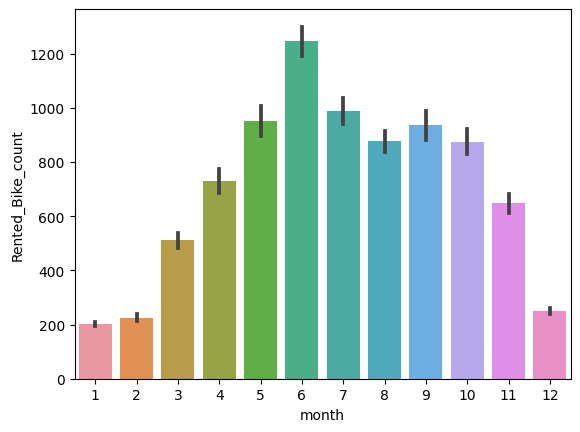

In [26]:
# Chart - 1 visualization code
# Creating visualization on month column

sns.barplot(data=bike_df,x='month',y='Rented_Bike_count').set_title=('Count of rented bikes on month basis')

##### 1. Are there any insight(s) found from the chart?

*  From the above plot, we get that the count of rented bike were high on summer time which is around the months of May-July.

#### Chart - 2

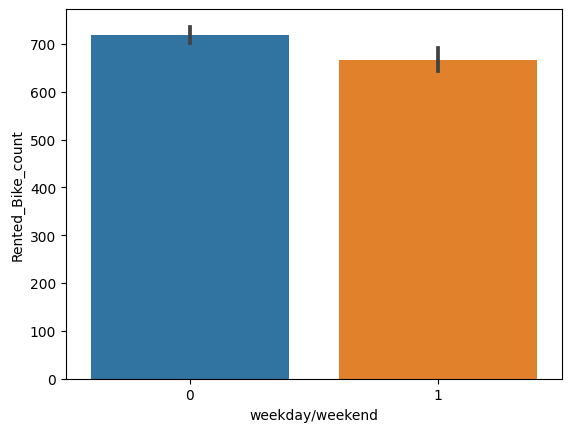

In [27]:
# Chart - 2 visualization code

sns.barplot(data=bike_df,x='weekday/weekend',y='Rented_Bike_count').set_title=('Count of bikes on weekday/weekend')

##### 1. Are there any insight(s) found from the chart?

* From the chart we clearly see that the demand of bikes were high in weekdays.

#### Chart - 3

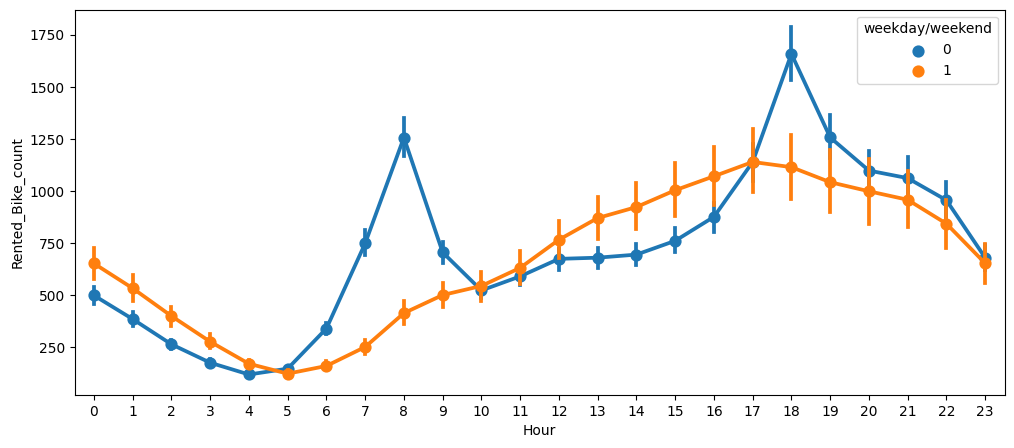

In [28]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(12, 5))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='weekday/weekend',ax=ax)
ax.set_title=('Count of bikes rented on hour basis')

##### 1. Are there any insight(s) found from the chart?

* In the above chart blue line represents the weekdays which shows the demand is high on two points which is 7-9 AM and 5-7 PM that might be to and fro travel from office to home.

* Whereas Orange line represents the demand on weekends which shows the count of bike rental is increasing at evening time (3-7 PM)


#### Chart - 4

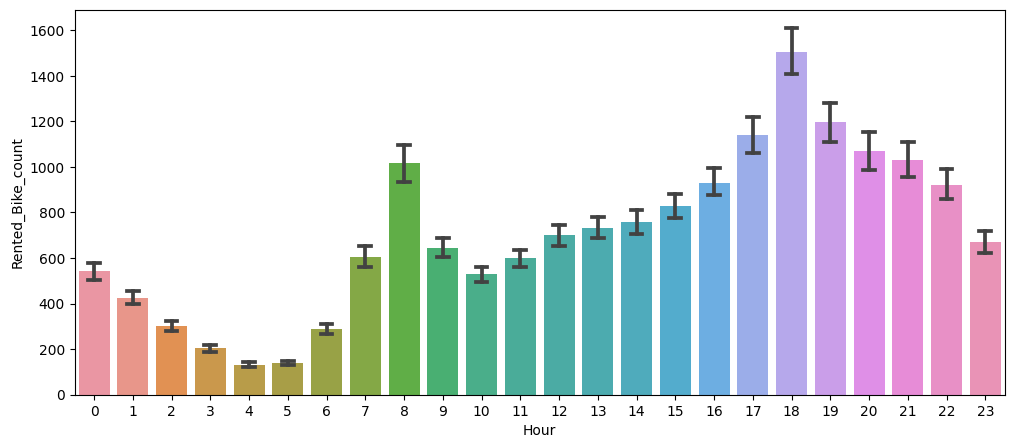

In [29]:
# Chart - 4 visualization code
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_count',ax=ax,capsize=0.3)
ax.set_title=('Count of bikes rented on hour basis')


* From the plot we came to know that use of rented bikes are steadily increasing in the points like (7-9 AM) and (5-7 PM).

#### Chart - 5

Text(0.5, 1.0, 'Count of bikes rented on Functioning_Day')

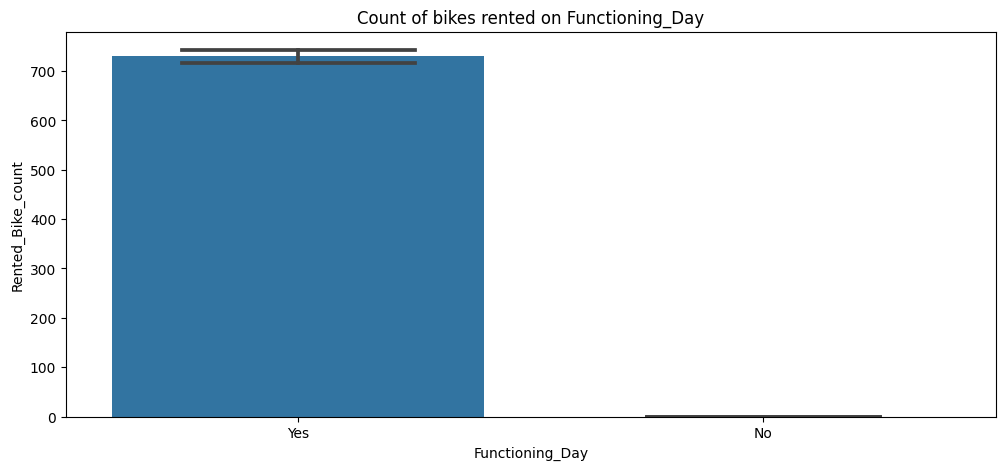

In [30]:
# Chart - 5 visualization code

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_count',ax=ax,capsize=.5)
ax.set_title('Count of bikes rented on Functioning_Day')

Text(0.5, 1.0, 'Count of bikes rented on Functioning_Day')

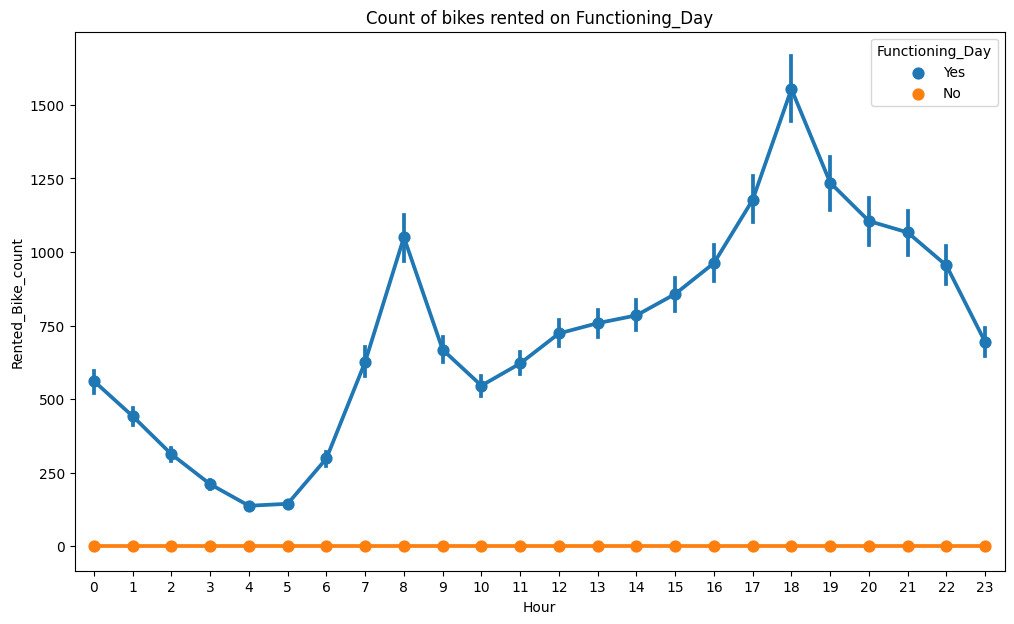

In [31]:
# Chart - 6 visualization code

fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='Functioning_Day',ax=ax)
ax.set_title('Count of bikes rented on Functioning_Day')

##### 1. Are there any insight(s) found from the chart?

* From the charts, we clear see that there is no demand for rented bikes on Non-Functioning Day.

#### Chart - 7

Text(0.5, 1.0, 'Season wise rented bike counts')

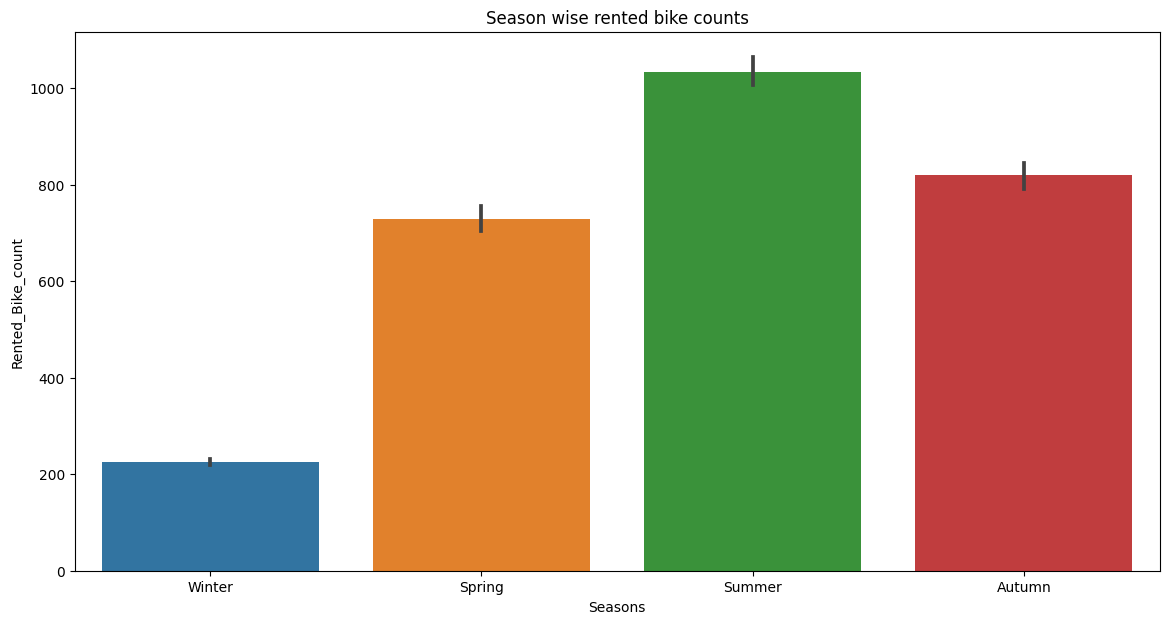

In [32]:
# Chart - 7 visualization code

fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_count',ax=ax)
ax.set_title('Season wise rented bike counts')

#### Chart - 8

Text(0.5, 1.0, 'Count of bikes rented on different Seasons')

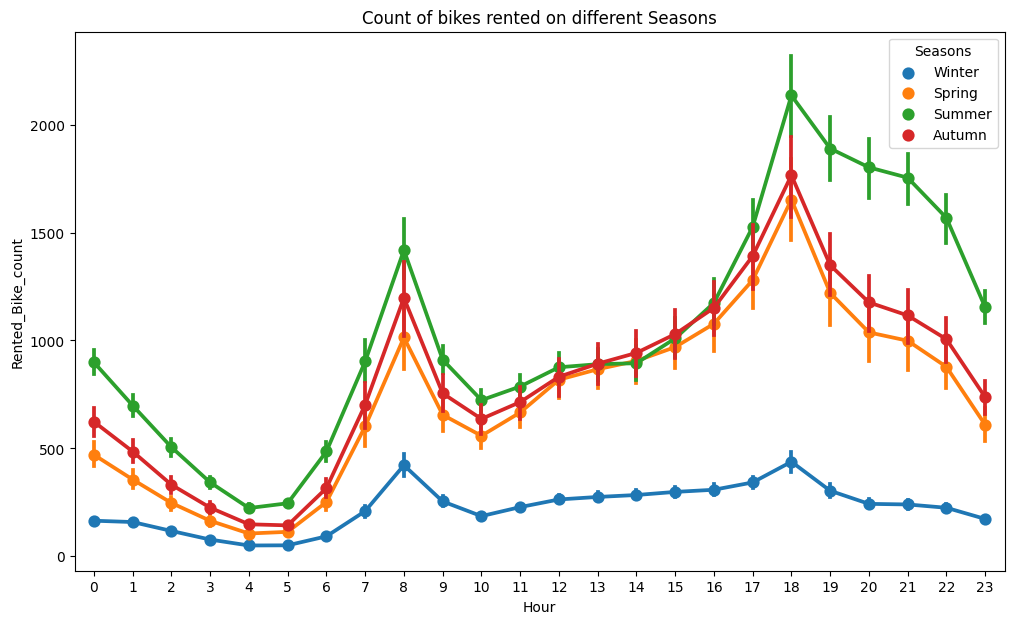

In [33]:
# Chart - 8 visualization code

fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='Seasons',ax=ax)
ax.set_title('Count of bikes rented on different Seasons')

##### 1. Are there any insight(s) found from the chart?

* From the above charts we clearly see that the demands were high in the summer season whereas it was very low in winter season.

* In the summer also peak times are as usual office timings which is 7-9 AM and 5-7 PM.

#### Chart - 9

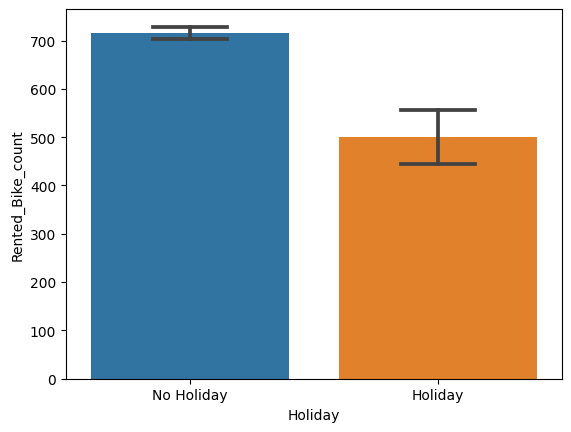

In [34]:
# Chart - 9 visualization code

sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_count',capsize=.3).set_title=('Count of bikes on Holidays')

#### Chart - 10

Text(0.5, 1.0, 'Count of hour-wise bikes rented on Holidays')

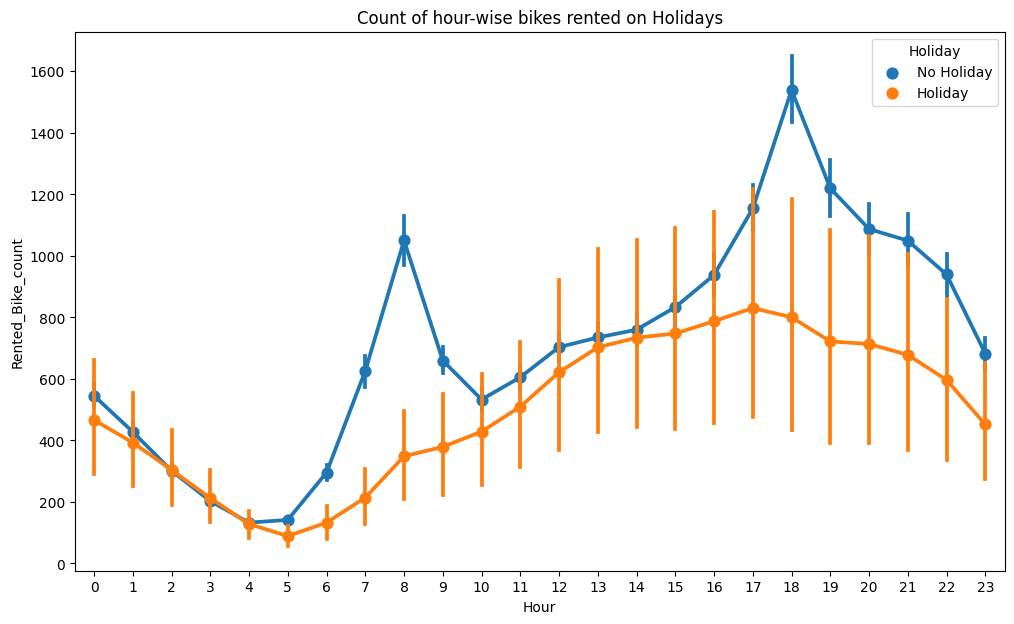

In [35]:
# Chart - 10 visualization code

fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='Holiday',ax=ax)
ax.set_title('Count of hour-wise bikes rented on Holidays')

##### 1. Are there any insight(s) found from the chart?

* From the above barplot and pointplot, we clearly see that use of rented bikes are higher on Non-holidays and in holidays usage is high on hours around 2-8 PM.

#### Analysis of Numerical variables on Distribution plots

In [36]:
# Chart - 11 visualization code
numerical_columns = list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

<ipython-input-37-7f3ee7c08662>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=bike_df[col])
<ipython-input-37-7f3ee7c08662>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=bike_df[col])
<ipython-input-37-7f3ee7c08662>:3: UserWarning: 

`distplot` is a deprecated function and will be remo

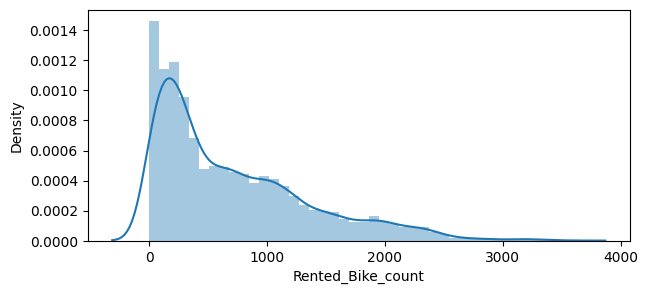

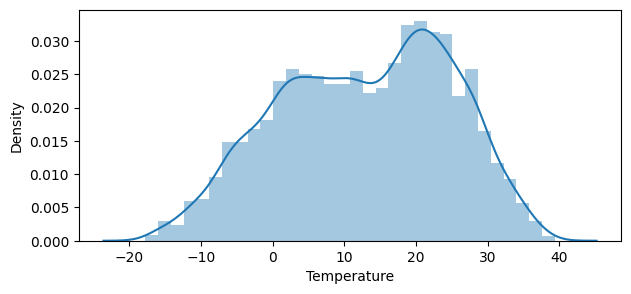

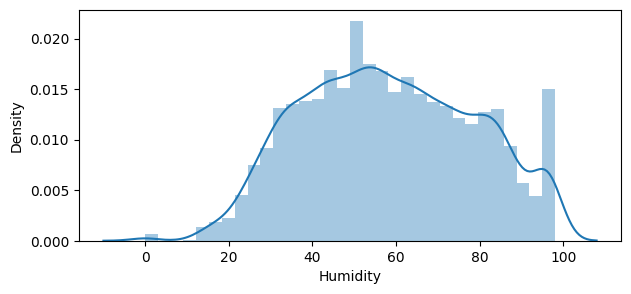

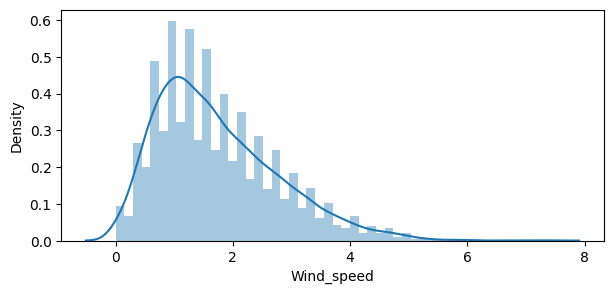

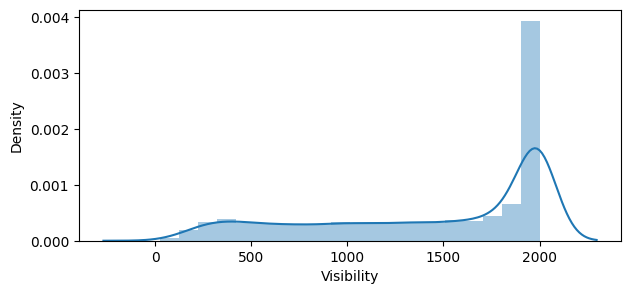

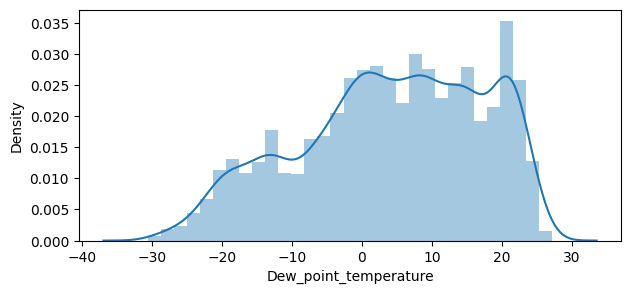

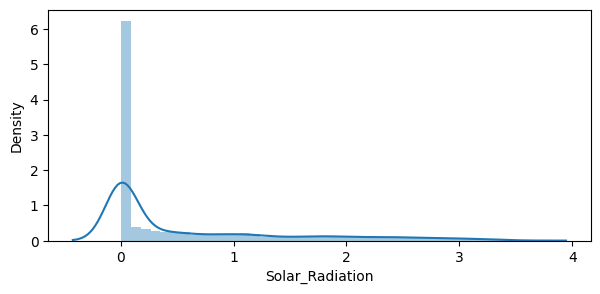

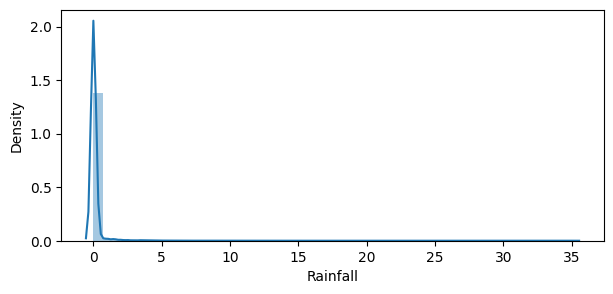

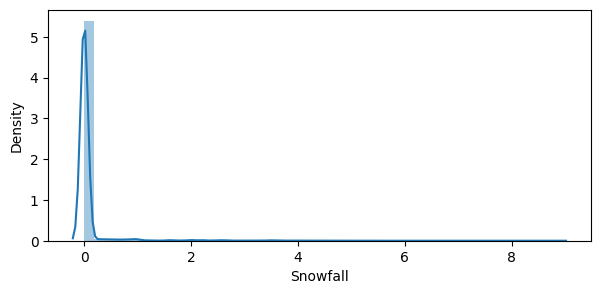

In [37]:
for col in numerical_features :
  plt.figure(figsize=(7,3))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

##### 1. Are there any insight(s) found from the chart?

From the above displot we found that how much skewness are there in the data,


1.   Right Skewed Columns - Rented_Bike_count, Wind speed, Solar radiation, Snowfall, Rainfall  
2.   Left Skewed Columns - Visibility, Dew point temperature


**Now we have to find how much numerical features are related to dependent variable.**

#### Numerical Columns VS Rented_Bike_count

<ipython-input-38-c3b258d51c5e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Temperature').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Temperature'>

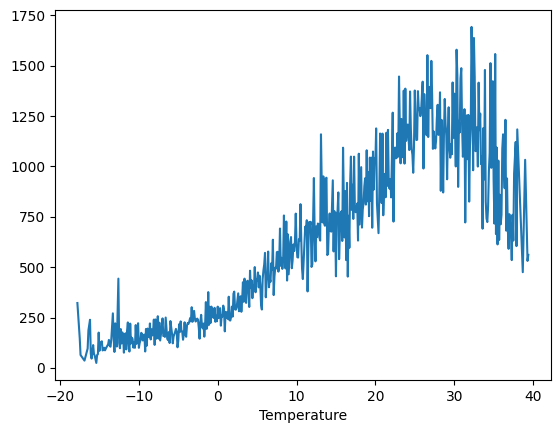

In [38]:
# Visualization code to analyse the relationship b/w "Rented_Bike_count" and "Temperature"

bike_df.groupby('Temperature').mean()['Rented_Bike_count'].plot()

##### 1. Are there any insights that lead to analyse? Justify with specific reason.



*  From the above plot we get that the people like to rent the bikes mostly when the temperature is around 25 degree celsius.



#### Chart - 13

<ipython-input-39-592e2749980c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Solar_Radiation'>

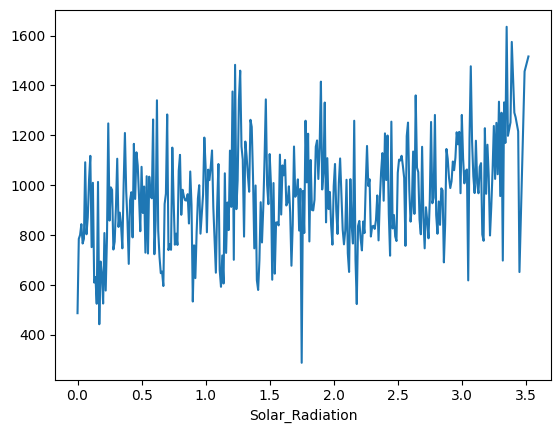

In [39]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and "Solar Radiation"

bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_count'].plot()


##### 1. Are there any insights that lead to analyse? Justify with specific reason.



*   From the above plot we see that, amount of rented bikes is huge when the solar radiation, the value is around 1000.





<ipython-input-40-961246e45791>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Snowfall').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Snowfall'>

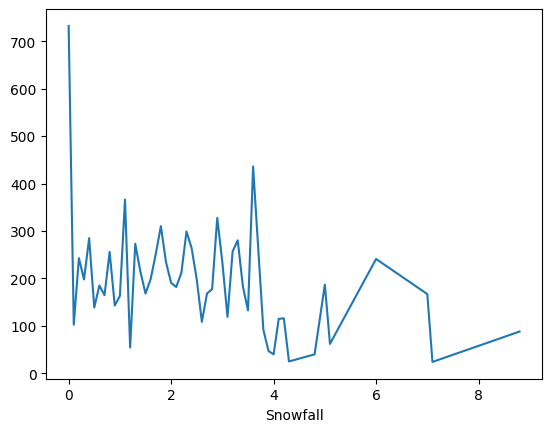

In [40]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and " Snowfall "

bike_df.groupby('Snowfall').mean()['Rented_Bike_count'].plot()

### 1. Are there any insights that lead to analyse? Justify with specific reason.


* We can see the plot shows that count of rented bikes are High when snowfall is Low and Moderate when snowfall is Average then Low when snowfall is above 4 cm

<ipython-input-41-f8f9d8628302>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Rainfall').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Rainfall'>

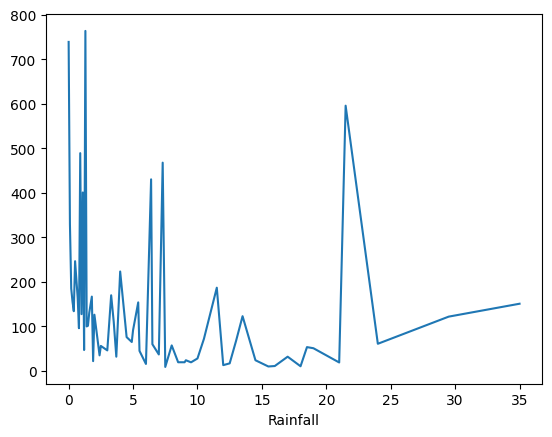

In [41]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and " Rainfall "

bike_df.groupby('Rainfall').mean()['Rented_Bike_count'].plot()

### 1. Are there any insights that lead to analyse? Justify with specific reason.

* From the above plot we see that the count of bike rented are distributed in various amount of rainfall when the fall is low the counts are high likewise in and around 20mm rainfall also the count of bike rent is increasing.

<ipython-input-42-6de72250d623>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Wind_speed').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Wind_speed'>

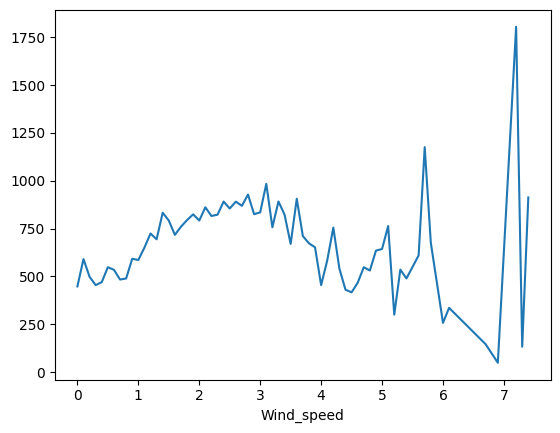

In [42]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and " Wind_speed "

bike_df.groupby('Wind_speed').mean()['Rented_Bike_count'].plot()

### 1. Are there any insights that lead to analyse? Justify with specific reason.

* From the above plot we see that the count of bikes rented are uniformly distributed in all different wind speeds and the counts are increased when windspeed was around 7 m/s, Which means people love ride bikes in windy conditions.

**REGRESSION PLOT**



*   Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. So that plots are used to analyse the relationships between the attributes of this dataset.




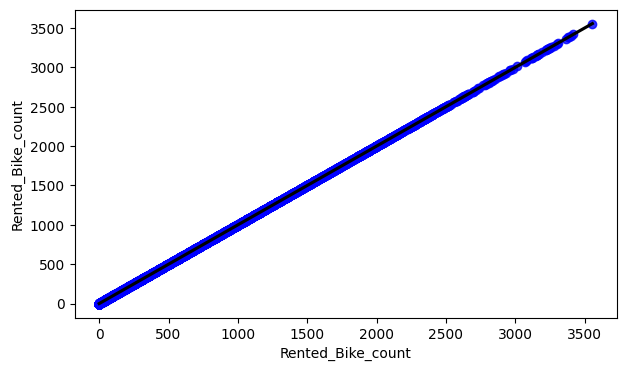

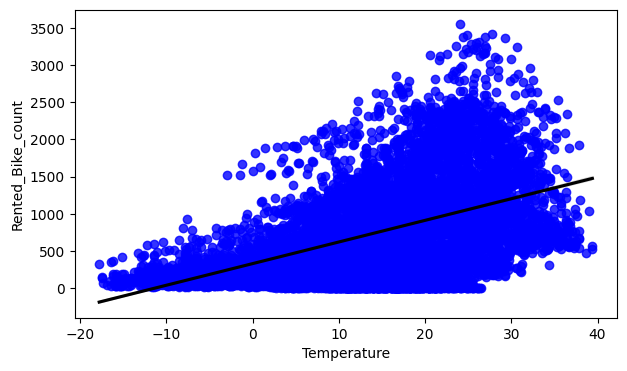

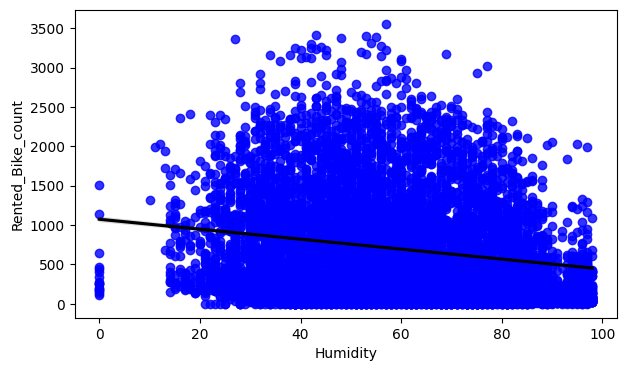

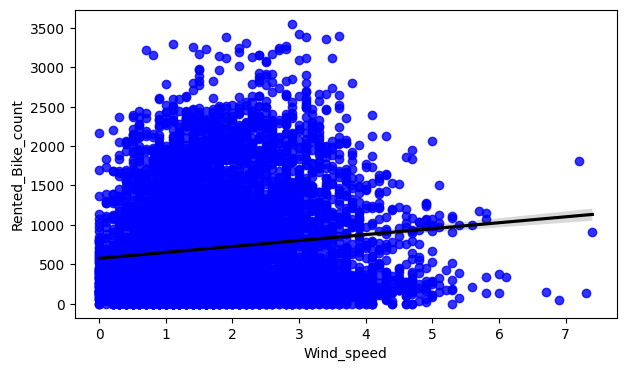

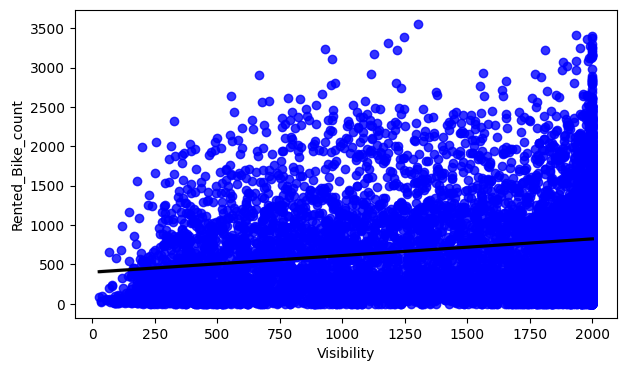

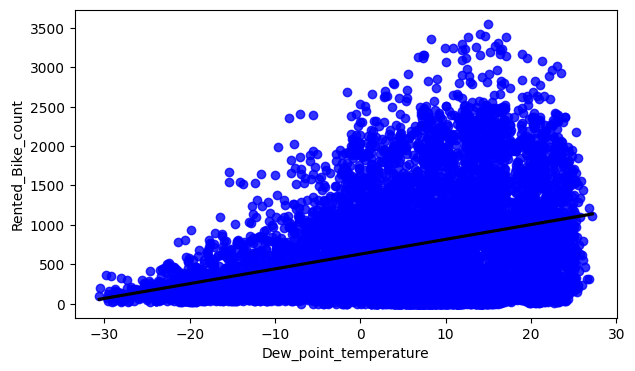

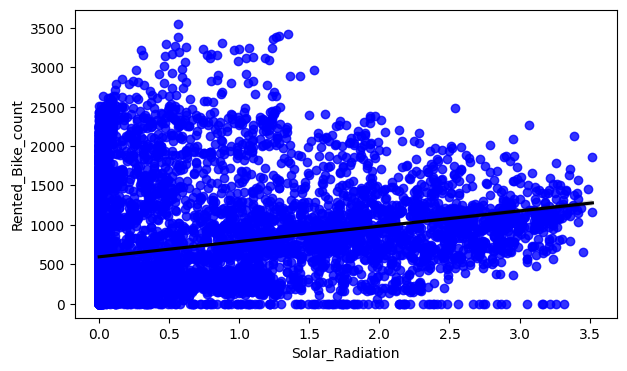

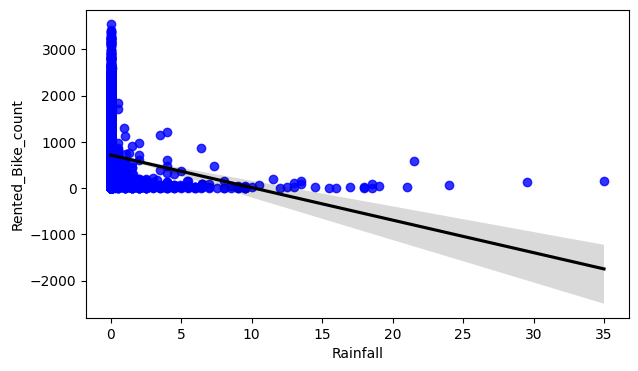

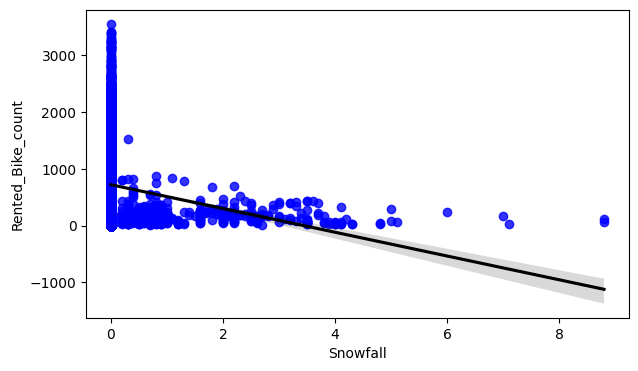

In [44]:
#Creating visualization of regression plot for all the numerical features

for columns in numerical_features:
  fig,ax = plt.subplots(figsize=(7,4))
  sns.regplot(x=bike_df[columns], y=bike_df['Rented_Bike_count'],scatter_kws={'color' : 'blue'}, line_kws={'color' : 'black'})

**What is/are the insight(s) found from the chart?**



*   From these plots we clearly see that the columns like Temperature, Wind speed, visibility, Dew point temperature, Solar radiation are positively related to the Target variable "Rented_Bike_count"
*   Likewise the variables like Rainfall, Snowfall, Humidity are negatively related to the target variable which means the count decreases when the value of feature increases.



#### Chart - 14 - Correlation Heatmap

<ipython-input-47-f44402e53da9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_df.corr(),annot=True)


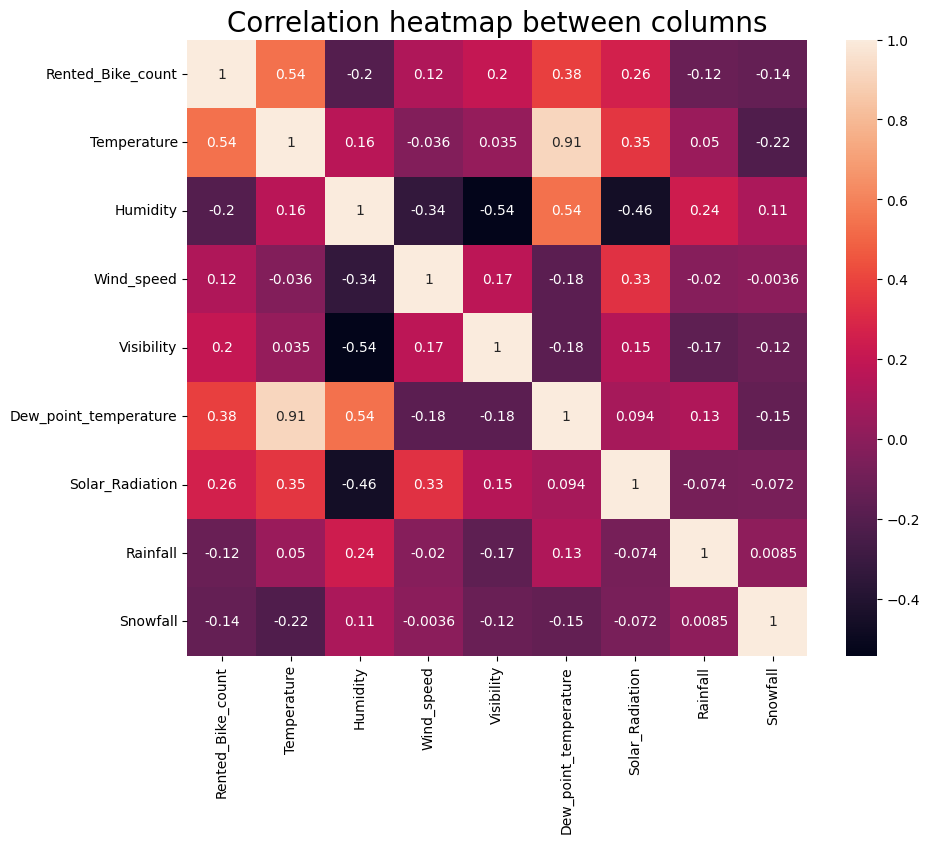

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))

#creating correlation heatmap with numeric values
sns.heatmap(bike_df.corr(),annot=True)

#creating visualization and setting title
plt.title('Correlation heatmap between columns',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

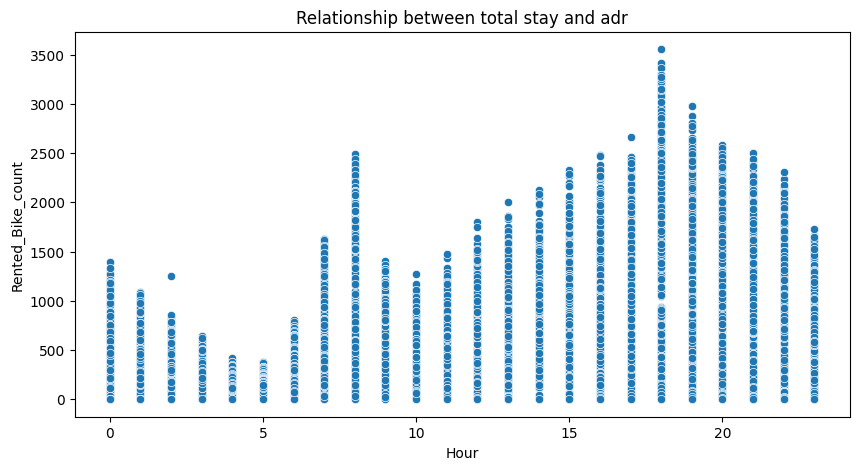

In [ ]:
# Pair Plot visualization code

#Creating scatter plot by defining size,plot values and title
plt.figure(figsize=(10,5))
sns.scatterplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_count'])
plt.title('Relationship between total stay and adr')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***